In [56]:
title = 'Days of our lives\n'
root = '/home/bob/projects/Web3HackerNetwork'
dataset_dir = root + "/data/github/2022-04-07-marine-search"
stats_dir = dataset_dir + "/projects"
# file = 'days.txt'
# path = root+'/'+file;
# days_file = open(path, 'r')
# days = days_file.read();
# new_path = root+'/new_days.txt'
# new_days = open(new_path, 'w')
# new_days.write(title)
# new_days.write(days)
# print(title)
# print(days)
# days_file.close();
# new_days.close();


In [39]:
def read_repo_stats(login, project, filename):
    path = stats_dir + "/" + login + "/" + project + "/" + filename
    stats = dict(login=login, project=project)
    with open(path, 'r') as f:
        for line in f:
            line = line.strip()
            (name, val) = line.split()
            # print("name: " + name + ", val: " + val);
            stats[name] = int(val)
    return stats

In [44]:
import os
start = stats_dir
all_stats = []
for root, logins, files in os.walk(start):
    # print(root);
    for login in logins:
        #print('login '+login);
        for r2, projects, f2 in os.walk(root+'/'+login):
            for project in projects:
                #print("project: " + project);
                for r3, d3, filenames in os.walk(root + "/" + login + "/" + project):
                    for filename in filenames:
                        if (filename == "repo-stat.log"):
                            # read_stats
                            # print("login: " + login + ", project: " + project + ", file: " + filename);
                            stats = read_repo_stats(login, project, filename);
                            all_stats.append(stats)

In [54]:
for stats in all_stats[slice(2,6,2)]: # begin (inclusive), end (exclusive), stepsize
    print(stats)

{'login': 'KirSerz', 'project': 'hackathon_wallet', 'num_files': 53, 'num_commits': 21, 'num_locs': 80798, 'num_rust_files': 3, 'num_react_files': 10, 'num_markdown_files': 3, 'num_binary_files': 4, 'num_rust_locs': 436, 'num_react_locs': 1458, 'num_markdown_locs': 372, 'num_binary_bytes': 87982}
{'login': 'cbonoz', 'project': 'hackfs21', 'num_files': 168, 'num_commits': 31, 'num_locs': 153737, 'num_rust_files': 2, 'num_react_files': 83, 'num_markdown_files': 3, 'num_binary_files': 25, 'num_rust_locs': 260, 'num_react_locs': 17902, 'num_markdown_locs': 750, 'num_binary_bytes': 4152837}


### write the stats to JSON on disk

In [69]:
import json

out_path = dataset_dir + "/all_repo_stats.json"
out_handle = open(out_path, "w");
out_handle.write(json.dumps(all_stats));
out_handle.flush()
out_handle.close()

### read the stats from JSON on disk

In [72]:
import json
in_path = dataset_dir + "/all_repo_stats.json"
in_stats = json.loads(open(in_path, 'r').read());
print(in_stats[slice(3)])

[{'login': 'PhilippeMts', 'project': 'hackfs-fragment', 'num_files': 156, 'num_commits': 396, 'num_locs': 26906, 'num_rust_files': 1, 'num_react_files': 39, 'num_markdown_files': 7, 'num_binary_files': 36, 'num_rust_locs': 26, 'num_react_locs': 8404, 'num_markdown_locs': 532, 'num_binary_bytes': 10912860}, {'login': 'amrosaeed', 'project': 'fluence', 'num_files': 779, 'num_commits': 4, 'num_locs': 402144, 'num_rust_files': 99, 'num_react_files': 114, 'num_markdown_files': 37, 'num_binary_files': 58, 'num_rust_locs': 13854, 'num_react_locs': 19844, 'num_markdown_locs': 12142, 'num_binary_bytes': 7268734}, {'login': 'KirSerz', 'project': 'hackathon_wallet', 'num_files': 53, 'num_commits': 21, 'num_locs': 80798, 'num_rust_files': 3, 'num_react_files': 10, 'num_markdown_files': 3, 'num_binary_files': 4, 'num_rust_locs': 436, 'num_react_locs': 1458, 'num_markdown_locs': 372, 'num_binary_bytes': 87982}]


### convert the raw stats to basic features

In [77]:
for stat in in_stats:
    stat['pct_rust_files'] = stat['num_rust_files'] / stat['num_files']
    stat['pct_react_files'] = stat['num_react_files'] / stat['num_files']
    print(str(stat['pct_rust_files']) + ', ' + str(stat['pct_react_files']))

0.00641025641025641, 0.25
0.12708600770218229, 0.14634146341463414
0.05660377358490566, 0.18867924528301888
0.023255813953488372, 0.3488372093023256
0.011904761904761904, 0.49404761904761907
0.011976047904191617, 0.49700598802395207
0.08333333333333333, 0.0
0.18461538461538463, 0.0
0.18461538461538463, 0.0
0.040983606557377046, 0.5081967213114754
0.029411764705882353, 0.5882352941176471
0.13485477178423236, 0.14522821576763487
0.023809523809523808, 0.16666666666666666
0.12244897959183673, 0.12244897959183673
0.038461538461538464, 0.23076923076923078
0.03686635944700461, 0.5253456221198156
0.12661498708010335, 0.14728682170542637
0.03333333333333333, 0.13333333333333333
0.79375, 0.003125
0.4, 0.02857142857142857
0.45454545454545453, 0.01818181818181818
0.3902439024390244, 0.024390243902439025
0.6395348837209303, 0.023255813953488372
0.1590909090909091, 0.0
0.037037037037037035, 0.25925925925925924
0.8210526315789474, 0.0
0.13485477178423236, 0.14522821576763487
0.18604651162790697, 0.02

In [79]:
print(in_stats[slice(2)])

[{'login': 'PhilippeMts', 'project': 'hackfs-fragment', 'num_files': 156, 'num_commits': 396, 'num_locs': 26906, 'num_rust_files': 1, 'num_react_files': 39, 'num_markdown_files': 7, 'num_binary_files': 36, 'num_rust_locs': 26, 'num_react_locs': 8404, 'num_markdown_locs': 532, 'num_binary_bytes': 10912860, 'pct_rust_files': 0.00641025641025641, 'pct_react_files': 0.25}, {'login': 'amrosaeed', 'project': 'fluence', 'num_files': 779, 'num_commits': 4, 'num_locs': 402144, 'num_rust_files': 99, 'num_react_files': 114, 'num_markdown_files': 37, 'num_binary_files': 58, 'num_rust_locs': 13854, 'num_react_locs': 19844, 'num_markdown_locs': 12142, 'num_binary_bytes': 7268734, 'pct_rust_files': 0.12708600770218229, 'pct_react_files': 0.14634146341463414}]


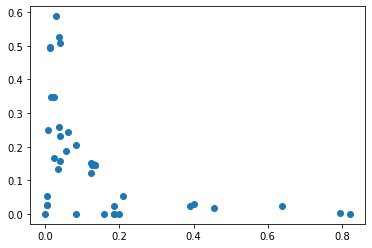

In [99]:
import matplotlib.pyplot as plt
import numpy as np

pct_rust_array = [val['pct_rust_files'] for val in in_stats]
pct_react_array = [val['pct_react_files'] for val in in_stats]
xpoints = np.array(pct_rust_array)
ypoints = np.array(pct_react_array)

plt.scatter(xpoints, ypoints)
plt.show()

(array([8., 3., 6., 2., 1., 1., 0., 5., 2., 1., 0., 3., 2., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]),
 array([0.        , 0.01642105, 0.03284211, 0.04926316, 0.06568421,
        0.08210526, 0.09852632, 0.11494737, 0.13136842, 0.14778947,
        0.16421053, 0.18063158, 0.19705263, 0.21347368, 0.22989474,
        0.24631579, 0.26273684, 0.27915789, 0.29557895, 0.312     ,
        0.32842105, 0.34484211, 0.36126316, 0.37768421, 0.39410526,
        0.41052632, 0.42694737, 0.44336842, 0.45978947, 0.47621053,
        0.49263158, 0.50905263, 0.52547368, 0.54189474, 0.55831579,
        0.57473684, 0.59115789, 0.60757895, 0.624     , 0.64042105,
        0.65684211, 0.67326316, 0.68968421, 0.70610526, 0.72252632,
        0.73894737, 0.75536842, 0.77178947, 0.78821053, 0.80463158,
        0.82105263]),
 <BarContainer object of 50 artists>)

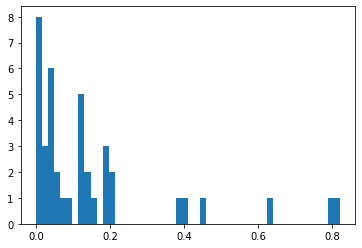

In [98]:
import matplotlib.pyplot as plt
import numpy as np
pct_rust_array = [val['pct_rust_files'] for val in in_stats]
plt.hist(np.array(pct_rust_array), 50)

(array([1., 0., 1., 0., 1., 4., 8., 6., 1., 1., 7., 3., 3., 3., 1.]),
 array([1.60943791, 1.94600945, 2.282581  , 2.61915254, 2.95572408,
        3.29229562, 3.62886717, 3.96543871, 4.30201025, 4.63858179,
        4.97515333, 5.31172488, 5.64829642, 5.98486796, 6.3214395 ,
        6.65801105]),
 <BarContainer object of 15 artists>)

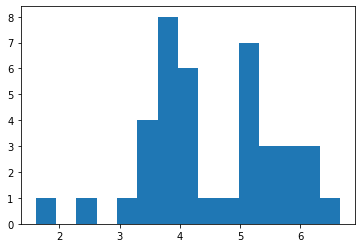

In [97]:
import matplotlib.pyplot as plt
import numpy as np
array = [np.log(val['num_files']) for val in in_stats]
#array = [val['num_files'] for val in in_stats]
plt.hist(np.array(array), 15)

In [3]:
import doctest
def add(a, b):
    """
    Given two integers, return the sum.

    :param a: int
    :param b: int
    :return: int

    >>> add(2, 3)
    5
    """
    return a + b
doctest.testmod()

TestResults(failed=0, attempted=1)

In [4]:
add(1,2)

3

In [5]:
print(path)

/home/bob/projects/Web3HackerNetwork/data/samples/days.txt


In [6]:
import doctest


def add(a, b):
    """
    Given two integers, return the sum.

    :param a: int
    :param b: int
    :return: int

    >>> add(2, 3)
    5
    >>> add(0, 0)
    0
    """
    return a * b

doctest.testmod()

**********************************************************************
File "__main__", line 12, in __main__.add
Failed example:
    add(2, 3)
Expected:
    5
Got:
    6
**********************************************************************
1 items had failures:
   1 of   2 in __main__.add
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=2)

In [7]:
def count_vowels(word):
    """
    Given a single word, return the total number of vowels in that single word.

    :param word: str
    :return: int

    >>> count_vowels('Cusco')
    2

    >>> count_vowels('Manila')
    3
    """
    total_vowels = 0
    for letter in word:
        if letter in 'aeiou':
            total_vowels += 1
    return total_vowels

if __name__ == "__main__":
    import doctest
    doctest.testmod()

**********************************************************************
File "__main__", line 12, in __main__.add
Failed example:
    add(2, 3)
Expected:
    5
Got:
    6
**********************************************************************
1 items had failures:
   1 of   2 in __main__.add
***Test Failed*** 1 failures.


In [8]:
import os
print(path)

/home/bob/projects/Web3HackerNetwork/data/samples/days.txt


In [10]:
start='/home/bob/projects/Web3HackerNetwork/data/github/2022-04-07-marine-search';
for root, dirs, files in os.walk(start):
    print(root);
    for dirname in dirs:
        print('Processing '+dirname);
        for r2, d2, f2 in os.walk(root+'/'+dirname):
            for dataFileName in f2:
                print('Root='+r2+' File='+dataFileName);

/home/bob/projects/Web3HackerNetwork/data/github/2022-04-07-marine-search
Processing commit-logs
Root=/home/bob/projects/Web3HackerNetwork/data/github/2022-04-07-marine-search/commit-logs File=trust-graph-test.txt
Root=/home/bob/projects/Web3HackerNetwork/data/github/2022-04-07-marine-search/commit-logs File=dxpriceaggregator.txt
Root=/home/bob/projects/Web3HackerNetwork/data/github/2022-04-07-marine-search/commit-logs File=aquavm.txt
Root=/home/bob/projects/Web3HackerNetwork/data/github/2022-04-07-marine-search/commit-logs File=fluencelabs-examples.txt
Root=/home/bob/projects/Web3HackerNetwork/data/github/2022-04-07-marine-search/commit-logs File=Fluence-Service.txt
Root=/home/bob/projects/Web3HackerNetwork/data/github/2022-04-07-marine-search/commit-logs File=fluence.txt
Root=/home/bob/projects/Web3HackerNetwork/data/github/2022-04-07-marine-search/commit-logs File=hackfs21.txt
Root=/home/bob/projects/Web3HackerNetwork/data/github/2022-04-07-marine-search/commit-logs File=hackathon_w

In [11]:
def addFiles(fileList, directory)
   for root, dirs, files in directory

SyntaxError: invalid syntax (3254314785.py, line 1)